In [1]:
%load_ext autoreload
%autoreload 2

In [131]:
from diffusion import GaussianDiffusion
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import torch

In [48]:
path = "./data"
dataset = CIFAR10(root=path, train=True, download=True, transform=v2.Compose([
    v2.ToTensor()
]))

dataloader = DataLoader(dataset, batch_size=1)

/home/ubuntu/.cache/pypoetry/virtualenvs/ddpm-NolEjOLK-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified


In [59]:
def display_image(img):
    """
    batch: (C, H, W)
    """
    figure(figsize=(1, 1))
    img = img.permute((1, 2, 0))
    plt.imshow(img)

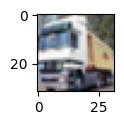

In [133]:
i = 1
img = dataset[i][0]

display_image(img)

In [75]:
beta_start = 0.0001
beta_end = 0.02
T = 1000

In [127]:
diffusion = GaussianDiffusion(
    beta_start=beta_start,
    beta_end=beta_end,
    timesteps=T
)

In [128]:
batch = img.unsqueeze(0).repeat(repeats=(2, 1, 1, 1))
batch.shape

torch.Size([2, 3, 32, 32])

In [129]:
sample = diffusion.q_sample(batch, t=100)
sample.shape

torch.Size([2, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


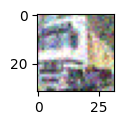

In [130]:
display_image(sample[0].squeeze(0))

In [147]:
x_t = torch.randn((1, 3, 32, 32))
x_0 = img

images = [x_t]
eps = torch.randn((1, 3, 32, 32))

for t in range(1000, 1, -1):
    mean, var = diffusion.q_posterior_mean_var(x_t, x_0, t)
    x_t = mean + (var ** 0.5) * eps
    images.append(x_t)

In [148]:
images

[tensor([[[[ 0.6371, -0.2290,  0.3134,  ..., -1.1083,  0.3681, -0.7520],
           [ 0.9402, -0.5093, -1.9697,  ..., -1.0829,  1.3915,  0.1394],
           [-1.1902,  1.6849, -2.1230,  ..., -0.5707,  1.0807,  1.2215],
           ...,
           [ 1.1449, -0.5340,  2.1203,  ...,  1.5507, -1.1986,  0.5908],
           [ 0.2238,  0.8352, -0.7172,  ..., -1.4381,  0.0807, -0.8400],
           [-0.5596,  0.1228,  0.6760,  ...,  0.8613,  0.7404,  0.0186]],
 
          [[-1.7850, -0.7202,  0.9297,  ...,  0.4705,  0.6294,  0.3779],
           [-0.3140, -1.4742,  0.8145,  ...,  1.1282,  0.9550, -0.2123],
           [-0.6825,  0.1662,  0.6597,  ..., -0.1616, -1.9648, -0.3119],
           ...,
           [-0.6133,  0.2821, -1.5385,  ..., -0.2226,  2.9208,  1.3908],
           [ 0.2955, -1.3129,  0.7989,  ...,  0.7755, -0.7569,  1.0875],
           [ 0.6345, -0.0972, -1.2416,  ..., -0.6017,  0.5509,  0.5823]],
 
          [[-2.8690, -1.4770,  0.3913,  ..., -0.2669, -1.3689,  0.8986],
           [ 

In [149]:
import imageio
import numpy as np

with imageio.get_writer('output_video.mp4', fps=1) as video:
    for tensor in images:
        # Remove the batch dimension and transpose the tensor to have (H, W, C) shape
        image = tensor.squeeze(0).permute(1, 2, 0).numpy()
        # Convert the image to uint8
        image = (image * 255).astype(np.uint8)
        video.append_data(image)

# print(images[-1].max())